In [160]:
import pandas as pd
import numpy as np
import arff
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
MLD_DIR = "/home/adel/Documents/Code/Ant-Miner/datasets/multi_label/"

In [162]:
with open(MLD_DIR + "emotions.arff") as f:
    dataset = arff.load(f)

# Convert to DataFrame
df = pd.DataFrame(dataset['data'], columns=[a[0] for a in dataset['attributes']])

In [163]:
df

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,2.0,0.261742,0.002657,1.149211,0,0,1,1,1,0
589,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,2.0,0.282122,0.052218,0.335371,1,0,0,0,1,1
590,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,2.0,0.184313,0.247136,0.476993,0,0,1,1,1,0
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,2.0,0.547126,0.183494,1.255820,0,1,1,0,0,0


In [164]:
#labels = [col for col in df.columns if 'Class' in col]
labels = [col for col in df.columns if col not in df.select_dtypes(include=[np.number]).columns]  # Non-numeric columns as labels
features = [col for col in df.columns if col not in labels]

print(len(features), len(labels))

72 6


In [165]:
# rename features to attrx and labels to labelx
df.rename(columns={col: f"attr{i+1}" for i, col in enumerate(features)}, inplace=True)
df.rename(columns={col: f"label{i+1}" for i, col in enumerate(labels)}, inplace=True)

In [166]:
df

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr69,attr70,attr71,attr72,label1,label2,label3,label4,label5,label6
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,2.0,0.261742,0.002657,1.149211,0,0,1,1,1,0
589,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,2.0,0.282122,0.052218,0.335371,1,0,0,0,1,1
590,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,2.0,0.184313,0.247136,0.476993,0,0,1,1,1,0
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,2.0,0.547126,0.183494,1.255820,0,1,1,0,0,0


In [167]:
labels = [col for col in df.columns if 'label' in col]
features = [col for col in df.columns if col not in labels]

In [168]:
# check for missing values
print(f'Missing values: {df.isnull().sum().sum()}')

Missing values: 0


In [169]:
# check duplicated rows
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


In [170]:
# drop duplicated rows
df = df.drop_duplicates().reset_index(drop=True)
print(f"Duplicated rows after dropping: {df.duplicated().sum()}")

Duplicated rows after dropping: 0


In [171]:
# check cols with one value
one_value_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"Number of columns with one value: {len(one_value_cols)}")

Number of columns with one value: 0


In [172]:
# discretize numeric features using qcut into 5 bins
for col in features:
    df[col] = pd.qcut(df[col], q=5, labels=False, duplicates='drop')

df

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr69,attr70,attr71,attr72,label1,label2,label3,label4,label5,label6
0,0,0,3,2,3,2,3,3,4,2,...,0,1,1,0,0,1,1,0,0,0
1,3,3,2,4,1,1,0,2,0,0,...,0,2,2,2,1,0,0,0,0,1
2,4,3,2,4,0,2,1,3,0,3,...,1,1,0,1,0,1,0,0,0,1
3,1,2,4,0,3,2,2,4,1,4,...,0,0,2,0,0,0,1,0,0,0
4,3,1,1,0,3,3,0,3,1,2,...,0,1,2,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0,0,0,0,4,4,2,1,2,1,...,0,2,0,3,0,0,1,1,1,0
589,4,3,2,4,0,2,1,3,4,1,...,0,2,0,0,1,0,0,0,1,1
590,0,0,0,0,4,1,0,4,4,0,...,0,1,2,1,0,0,1,1,1,0
591,1,3,4,2,1,4,4,2,3,4,...,0,3,1,3,0,1,1,0,0,0


In [173]:
# df to int
df = df.astype(int)

In [174]:
# save dataset
df.to_csv(os.path.join(MLD_DIR, "emotions.csv"), index=False)

In [175]:
features = [col for col in df.columns if 'label' not in col]
labels = [col for col in df.columns if 'label' in col]

In [176]:
# Compute correlation matrix
corr_matrix = df[features].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Dropping {len(to_drop)} features out of {len(features)}")

#df = df.drop(columns=to_drop)

Dropping 0 features out of 72


In [177]:
counts = [] 
for col in labels: 
    vc = df[col].value_counts() 
    for val, cnt in vc.items(): 
        counts.append({"Label": col, "Value": str(val), "Count": cnt}) 
counts_df = pd.DataFrame(counts) 
# Pivot for grouped bar plotting 
pivot_df = counts_df.pivot(index="Label", columns="Value", values="Count")

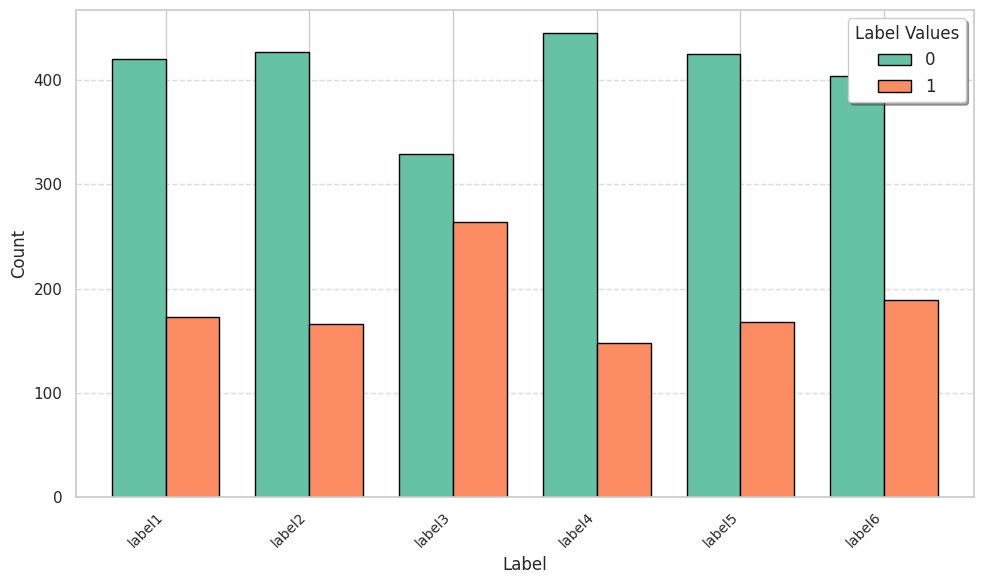

In [178]:
# Set a nicer style
sns.set_theme(style="whitegrid", palette="Set2")

# Plot
ax = pivot_df.plot(
    kind="bar", 
    figsize=(10, 6), 
    width=0.75,         # bar thickness
    edgecolor="black",  # outline bars
)

# Title and labels
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right", fontsize=10)

# Legend styling
plt.legend(
    title="Label Values", 
    title_fontsize=12, 
    fontsize=12, 
    frameon=True, 
    fancybox=True, 
    shadow=True,
    loc="best"
)

# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


In [179]:
# drop labels having less than 1% percentage of positive instances
label_stats = {}
for label in labels:
    pos_count = len(df[df[label] == 1])
    neg_count = len(df) - pos_count
    pos_percentage = (pos_count / len(df)) * 100
    label_stats[label] = {
        "positive_count": pos_count,
        "negative_count": neg_count,
        "positive_percentage": pos_percentage
    }
    #print(f"Label: {label}, Positive Count: {pos_count}, Negative Count: {neg_count}, Positive Percentage: {pos_percentage:.2f}%")

    if pos_percentage < 1.5:
        #df = df.drop(columns=[label])
        print(f"Dropped label {label} due to low positive percentage.")

In [181]:
# save
df.to_csv(os.path.join(MLD_DIR, "cleaned/emotions.csv"), index=False)